In [1]:
# =============================================================================
# SHARED PARAMETERS - Modify these settings to customize the analysis
# =============================================================================

# Framework and data configuration
FRAMEWORK_PATH = '1_docs/frameworks/3_2_spec_frameworks/populism_pluralism/democratic_tension_axis_model_brazil_2018.yaml'
RESULTS_DATA_PATH = '../../results/bolsonaro_democratic_tension_analysis.csv'

# Analysis parameters
EXPERIMENT_ID = 'demo_democratic_tension_2018_bolsonaro'
CORPUS_NAME = 'Bolsonaro 2018 Campaign Speeches'
TOTAL_SPEECHES = 127
TEMPORAL_PHASES = 3

# Validation metrics (would be populated by Stage 5)
STAGE5_CORRELATION = 0.89
SIGNIFICANCE_LEVEL = 'p < 0.001'

# =============================================================================
# VISUALIZATION PARAMETERS - Consistent styling across all visualizations
# =============================================================================

# Figure dimensions and quality
FIGURE_SIZE_SIMPLE = (14, 6)          # Two-panel layout
FIGURE_SIZE_COMPLEX = (16, 10)        # Multi-panel complex layout
DPI_NOTEBOOK = 150
DPI_EXPORT = 300
EXPORT_FORMATS = ['eps', 'pdf', 'png', 'svg']

# Color schemes (consistent across all visualizations)
ANCHOR_COLORS = {
    'populism': '#E53E3E',      # Red - strong, attention-grabbing
    'pluralism': '#3182CE',     # Blue - institutional, calm
    'nationalism': '#D69E2E',   # Gold - traditional, strong
    'patriotism': '#38A169'     # Green - stable, constitutional
}

PHASE_COLORS = {
    'early_campaign': '#FF7F0E',    # Orange - energetic start
    'mid_campaign': '#9467BD',      # Purple - strategic middle
    'final_push': '#8C564B'         # Brown - determined finish
}

ACCENT_COLORS = {
    'centroid': '#DC143C',          # Crimson - overall campaign position
    'trajectory': '#000000',        # Black - movement path
    'grid': '#D3D3D3',             # Light gray - subtle reference
    'highlight': '#FFD700'          # Gold - emphasis points
}

# Typography (Nature journal standards)
FONT_CONFIG = {
    'family': 'sans-serif',
    'sans_serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'title_size': 12,
    'label_size': 10,
    'tick_size': 8,
    'legend_size': 7,
    'annotation_size': 9
}

# Marker and line styling
MARKER_CONFIG = {
    'anchor_size': 150,
    'anchor_style': 's',           # Square markers for anchors
    'speech_size': 40,
    'speech_alpha': 0.7,
    'centroid_size': 250,
    'centroid_style': '*',         # Star for overall centroid
    'trajectory_width': 2,
    'grid_alpha': 0.3
}

# Positioning and spacing
LAYOUT_CONFIG = {
    'anchor_label_distance': 1.25,     # How far anchor labels are from center
    'axis_label_distance': 0.85,      # Distance for axis labels
    'circle_boundary': 1.0,           # Unit circle radius
    'plot_limits': 1.4,               # Plot axis limits
    'legend_alpha': 0.8,
    'bbox_padding': 0.3
}

# Export and academic settings
ACADEMIC_CONFIG = {
    'citation_style': 'nature',
    'figure_quality': 'publication',
    'statistical_precision': 4,       # Decimal places for stats
    'metadata_detail': 'comprehensive'
}

# Random seed for reproducible synthetic data generation
RANDOM_SEED = 42

print("✅ Shared parameters configured")
print(f"📊 Framework: {FRAMEWORK_PATH}")
print(f"📈 Expected speeches: {TOTAL_SPEECHES}")
print(f"🎯 Experiment: {EXPERIMENT_ID}")


✅ Shared parameters configured
📊 Framework: 1_docs/frameworks/3_2_spec_frameworks/populism_pluralism/democratic_tension_axis_model_brazil_2018.yaml
📈 Expected speeches: 127
🎯 Experiment: demo_democratic_tension_2018_bolsonaro


In [2]:
# Democratic Tension Axis Analysis: Stage 6 Results Interpretation
# Generated automatically from Stage 5 CLI analysis (run_experiment.py)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import json
import yaml
from pathlib import Path
from datetime import datetime

# Configure matplotlib for academic publication standards using shared parameters
def setup_publication_style():
    """Configure matplotlib for Nature/academic journal standards using shared parameters"""
    plt.rcParams.update({
        'font.family': FONT_CONFIG['family'],
        'font.sans-serif': FONT_CONFIG['sans_serif'],
        'font.size': FONT_CONFIG['tick_size'],
        'figure.dpi': DPI_NOTEBOOK,
        'axes.linewidth': 0.5,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.labelsize': FONT_CONFIG['label_size'],
        'axes.titlesize': FONT_CONFIG['title_size'],
        'xtick.labelsize': FONT_CONFIG['tick_size'],
        'ytick.labelsize': FONT_CONFIG['tick_size'],
        'grid.linewidth': 0.5,
        'grid.alpha': MARKER_CONFIG['grid_alpha'],
        'legend.frameon': False,
        'legend.fontsize': FONT_CONFIG['legend_size']
    })

setup_publication_style()

# Experiment metadata (using shared parameters)
EXPERIMENT_META = {
    'job_id': EXPERIMENT_ID,
    'framework_name': 'Democratic Tension Axis Model – Brazil 2018',
    'experiment_date': datetime.now().strftime('%Y-%m-%d'),
    'stage5_validation': {'correlation_with_manual': STAGE5_CORRELATION, 'significance': SIGNIFICANCE_LEVEL},
    'corpus': CORPUS_NAME,
    'total_speeches': TOTAL_SPEECHES,
    'temporal_phases': TEMPORAL_PHASES
}

print(f"🎯 {EXPERIMENT_META['framework_name']} Analysis")
print(f"📊 Experiment ID: {EXPERIMENT_META['job_id']}")
print(f"📈 Stage 5 Validation: r={EXPERIMENT_META['stage5_validation']['correlation_with_manual']}")
print("="*60)

# Load Stage 5 results with realistic Democratic Tension data
def create_realistic_bolsonaro_data():
    """Create realistic Bolsonaro campaign data based on Democratic Tension Axis patterns"""
    np.random.seed(RANDOM_SEED)  # Use shared parameter for reproducibility
    
    # Realistic speech timeline over 2018 campaign
    dates = pd.date_range('2018-01-15', '2018-10-28', periods=TOTAL_SPEECHES)
    
    # Create realistic score patterns for orthogonal axes
    # Early campaign: Higher populism, moderate nationalism
    # Mid campaign: Strategic positioning 
    # Final push: High populism + high nationalism (the "Bolsonaro positioning")
    
    speeches = []
    for i, date in enumerate(dates):
        # Determine temporal phase
        if date < pd.Timestamp('2018-05-01'):
            phase = 'early_campaign'
            pop_base, plur_base = 1.4, 0.3  # High populism, low pluralism
            nat_base, pat_base = 0.8, 0.6   # Moderate nationalism, moderate patriotism
        elif date < pd.Timestamp('2018-08-01'):
            phase = 'mid_campaign'  
            pop_base, plur_base = 1.2, 0.5  # Still high populism, slightly more pluralism
            nat_base, pat_base = 1.1, 0.8   # Increased nationalism and patriotism
        else:
            phase = 'final_push'
            pop_base, plur_base = 1.6, 0.2  # Very high populism, very low pluralism
            nat_base, pat_base = 1.5, 0.4   # Very high nationalism, lower patriotism
        
        # Generate scores with realistic variation (0-2 scale for T&F compatibility)
        pop_score = np.clip(np.random.normal(pop_base, 0.3), 0.0, 2.0)
        plur_score = np.clip(np.random.normal(plur_base, 0.2), 0.0, 2.0)
        nat_score = np.clip(np.random.normal(nat_base, 0.3), 0.0, 2.0)
        pat_score = np.clip(np.random.normal(pat_base, 0.25), 0.0, 2.0)
        
        speeches.append({
            'speech_id': f'bolsonaro_speech_{i+1:03d}',
            'date': date,
            'populism_score': pop_score,
            'pluralism_score': plur_score,
            'nationalism_score': nat_score,
            'patriotism_score': pat_score,
            'temporal_phase': phase,
            'venue': np.random.choice(['rally', 'tv_interview', 'social_media', 'debate']),
            'confidence': np.random.uniform(0.85, 0.98)  # High confidence scores
        })
    
    return pd.DataFrame(speeches)

# Load or create results data
try:
    results_df = pd.read_csv(RESULTS_DATA_PATH)
    print(f"✅ Loaded {len(results_df)} analyzed speeches from Stage 5")
except FileNotFoundError:
    print("📝 Generating realistic Democratic Tension analysis data...")
    results_df = create_realistic_bolsonaro_data()
    print(f"✅ Generated {len(results_df)} speeches with orthogonal axis dynamics")

print(f"\n📊 Dataset Overview:")
print(f"   • Time period: {results_df['date'].min().date()} to {results_df['date'].max().date()}")
print(f"   • Temporal phases: {results_df['temporal_phase'].value_counts().to_dict()}")
print(f"   • Score ranges: Pop[{results_df['populism_score'].min():.2f}-{results_df['populism_score'].max():.2f}], "
      f"Plur[{results_df['pluralism_score'].min():.2f}-{results_df['pluralism_score'].max():.2f}], "
      f"Nat[{results_df['nationalism_score'].min():.2f}-{results_df['nationalism_score'].max():.2f}], "
      f"Pat[{results_df['patriotism_score'].min():.2f}-{results_df['patriotism_score'].max():.2f}]")

results_df.head()


🎯 Democratic Tension Axis Model – Brazil 2018 Analysis
📊 Experiment ID: demo_democratic_tension_2018_bolsonaro
📈 Stage 5 Validation: r=0.89
📝 Generating realistic Democratic Tension analysis data...
✅ Generated 127 speeches with orthogonal axis dynamics

📊 Dataset Overview:
   • Time period: 2018-01-15 to 2018-10-28
   • Temporal phases: {'early_campaign': 47, 'mid_campaign': 41, 'final_push': 39}
   • Score ranges: Pop[0.46-2.00], Plur[0.00-1.07], Nat[0.26-2.00], Pat[0.00-1.26]


,speech_id,date,populism_score,pluralism_score,nationalism_score,patriotism_score,temporal_phase,venue,confidence
0,bolsonaro_speech_001,2018-01-15 00:00:00.000000000,1.549014,0.272347,0.994307,0.980757,early_campaign,social_media,0.907958
1,bolsonaro_speech_002,2018-01-17 06:28:34.285714285,1.371614,0.114234,0.534431,0.496953,early_campaign,social_media,0.852676
2,bolsonaro_speech_003,2018-01-19 12:57:08.571428571,1.225737,0.194966,0.628586,0.368979,early_campaign,tv_interview,0.850919
3,bolsonaro_speech_004,2018-01-21 19:25:42.857142857,1.406667,0.214441,0.640455,0.570631,early_campaign,debate,0.897627
4,bolsonaro_speech_005,2018-01-24 01:54:17.142857142,1.839695,0.254845,0.820258,0.243813,early_campaign,debate,0.910679


In [3]:
# Democratic Tension Axis: DCS Coordinate Analysis
# Implementing the orthogonal axis framework resolving the "crowding out" problem

def load_democratic_tension_framework():
    """Load Democratic Tension Axis framework configuration"""
    try:
        # Try to load from the actual framework file using shared parameter
        framework_path = Path(FRAMEWORK_PATH)
        if framework_path.exists():
            with open(framework_path, 'r') as f:
                framework_data = yaml.safe_load(f)
            print(f"✅ Loaded framework from {framework_path}")
            return framework_data
    except Exception as e:
        print(f"⚠️ Could not load framework file: {e}")
    
    # Fallback: Create framework structure matching the actual YAML
    framework = {
        'name': 'Democratic Tension Axis Model – Brazil 2018',
        'version': 'v3.2',
        'theoretical_foundation': 'Orthogonal democratic tensions with Portuguese optimization',
        'components': {
            'populism': {
                'component_id': 'populism',
                'type': 'anchor',
                'angle': 90,  # 12 o'clock - top of circle
                'position': (0.0, 1.0),
                'color': '#E53E3E',  # Red
                'description': 'Direct popular sovereignty, anti-elite rhetoric, Manichaean worldview'
            },
            'pluralism': {
                'component_id': 'pluralism',
                'type': 'anchor', 
                'angle': 270,  # 6 o'clock - bottom of circle
                'position': (0.0, -1.0),
                'color': '#3182CE',  # Blue
                'description': 'Institutional mediation, diverse representation, expert knowledge valorization'
            },
            'nationalism': {
                'component_id': 'nationalism',
                'type': 'anchor',
                'angle': 0,  # 3 o'clock - right of circle
                'position': (1.0, 0.0),
                'color': '#D69E2E',  # Gold
                'description': 'Emphasis on ethnic/cultural identity, national supremacy claims'
            },
            'patriotism': {
                'component_id': 'patriotism',
                'type': 'anchor',
                'angle': 180,  # 9 o'clock - left of circle
                'position': (-1.0, 0.0),
                'color': '#38A169',  # Green
                'description': 'Civic attachment to political institutions and constitutional values'
            }
        },
        'axes': {
            'PopulismPluralism': {
                'component_id': 'populism_pluralism_axis',
                'anchor_ids': ['populism', 'pluralism'],
                'description': 'Vertical dimension of democratic legitimacy',
                'axis_type': 'bipolar'
            },
            'PatriotismNationalism': {
                'component_id': 'patriotism_nationalism_axis', 
                'anchor_ids': ['patriotism', 'nationalism'],
                'description': 'Horizontal dimension of national identity',
                'axis_type': 'bipolar'
            }
        }
    }
    print("📝 Using fallback framework structure")
    return framework

def calculate_orthogonal_signatures(scores_dict, framework):
    """Calculate signature coordinates in orthogonal two-axis system"""
    # Extract scores
    populism = scores_dict['populism_score']
    pluralism = scores_dict['pluralism_score'] 
    nationalism = scores_dict['nationalism_score']
    patriotism = scores_dict['patriotism_score']
    
    # Calculate orthogonal axis positions
    # Vertical axis: Populism (positive) vs Pluralism (negative)
    vertical_axis = (populism - pluralism) / 2.0  # Range: -1 to +1
    
    # Horizontal axis: Nationalism (positive) vs Patriotism (negative)  
    horizontal_axis = (nationalism - patriotism) / 2.0  # Range: -1 to +1
    
    # Keep coordinates within unit circle
    magnitude = np.sqrt(vertical_axis**2 + horizontal_axis**2)
    if magnitude > 1.0:
        vertical_axis = vertical_axis / magnitude
        horizontal_axis = horizontal_axis / magnitude
    
    return np.array([horizontal_axis, vertical_axis])

# Load framework and calculate signatures
framework = load_democratic_tension_framework()
print("🎯 Democratic Tension Axis Framework")
print(f"   Theoretical foundation: {framework.get('theoretical_foundation', 'Orthogonal democratic tensions')}")

print("\n📍 Framework Components:")
components = framework.get('components', {})
for name, config in components.items():
    x, y = config.get('position', (0, 0))
    print(f"   • {name.title()}: ({x:.3f}, {y:.3f}) - {config.get('description', '')[:60]}...")

print("\n📐 Orthogonal Axes:")
axes = framework.get('axes', {})
for axis_name, axis_config in axes.items():
    anchor_ids = axis_config.get('anchor_ids', [])
    print(f"   • {axis_name}: {' ↔ '.join(anchor_ids)} - {axis_config.get('description', '')}")

# Calculate signatures with orthogonal dynamics
signatures = {}

print(f"\n🔄 Calculating orthogonal signatures...")
for idx, row in results_df.iterrows():
    scores = {
        'populism_score': row['populism_score'],
        'pluralism_score': row['pluralism_score'],
        'nationalism_score': row['nationalism_score'],
        'patriotism_score': row['patriotism_score']
    }
    
    signature = calculate_orthogonal_signatures(scores, framework)
    signatures[row['speech_id']] = signature

print(f"✅ Calculated {len(signatures)} orthogonal signatures")

# Show coordinate examples
example_speeches = list(signatures.keys())[:3]
print(f"\n📊 Signature Examples:")
for speech_id in example_speeches:
    coords = signatures[speech_id]
    print(f"   • {speech_id}: ({coords[0]:.3f}, {coords[1]:.3f})")

# Display framework validation metrics
all_coords = np.array(list(signatures.values()))
centroid_distance = np.linalg.norm(np.mean(all_coords, axis=0))
axis_correlation = np.corrcoef(all_coords[:, 0], all_coords[:, 1])[0, 1]

print(f"\n📈 Framework Validation:")
print(f"   • Overall discourse intensity: {centroid_distance:.3f}")
print(f"   • Coordinate space utilization: {np.std(all_coords):.3f}")
print(f"   • Axis independence (correlation): {axis_correlation:.4f}")
if abs(axis_correlation) < 0.1:
    print(f"   ✅ Excellent orthogonal independence")
elif abs(axis_correlation) < 0.3:
    print(f"   ✅ Good orthogonal independence") 
else:
    print(f"   ⚠️ Moderate axis correlation detected")


📝 Using fallback framework structure
🎯 Democratic Tension Axis Framework
   Theoretical foundation: Orthogonal democratic tensions with Portuguese optimization

📍 Framework Components:
   • Populism: (0.000, 1.000) - Direct popular sovereignty, anti-elite rhetoric, Manichaean ...
   • Pluralism: (0.000, -1.000) - Institutional mediation, diverse representation, expert know...
   • Nationalism: (1.000, 0.000) - Emphasis on ethnic/cultural identity, national supremacy cla...
   • Patriotism: (-1.000, 0.000) - Civic attachment to political institutions and constitutiona...

📐 Orthogonal Axes:
   • PopulismPluralism: populism ↔ pluralism - Vertical dimension of democratic legitimacy
   • PatriotismNationalism: patriotism ↔ nationalism - Horizontal dimension of national identity

🔄 Calculating orthogonal signatures...
✅ Calculated 127 orthogonal signatures

📊 Signature Examples:
   • bolsonaro_speech_001: (0.007, 0.638)
   • bolsonaro_speech_002: (0.019, 0.629)
   • bolsonaro_speech_003: (0

In [4]:
# Strategic Temporal Evolution: Advanced Multi-Panel Analysis

def plot_comprehensive_temporal_evolution(framework, signatures, results_df):
    """Advanced temporal analysis with comprehensive multi-panel layout (Sarah's approach)"""
    
    fig = plt.figure(figsize=FIGURE_SIZE_COMPLEX)
    
    # Create complex grid layout (matching Sarah's 3x3 approach)
    gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[2, 1, 1])
    
    # Main plot: Trajectory in coordinate space with time evolution
    ax_main = fig.add_subplot(gs[0, :2])
    circle = patches.Circle((0, 0), LAYOUT_CONFIG['circle_boundary'], 
                           fill=False, color='black', linewidth=2, alpha=0.8)
    ax_main.add_patch(circle)
    
    # Draw orthogonal axes prominently using shared parameters
    ax_main.axhline(y=0, color=ACCENT_COLORS['grid'], linewidth=2, alpha=0.6, linestyle='-')
    ax_main.axvline(x=0, color=ACCENT_COLORS['grid'], linewidth=2, alpha=0.6, linestyle='-')
    
    # Plot framework anchors using shared color scheme
    components = framework.get('components', {})
    for name, config in components.items():
        x, y = config.get('position', (0, 0))
        color = ANCHOR_COLORS.get(name, config.get('color', '#cccccc'))
        ax_main.scatter(x, y, s=MARKER_CONFIG['anchor_size'], c=color, 
                       marker=MARKER_CONFIG['anchor_style'], edgecolors='black', 
                       linewidth=2, zorder=15, alpha=0.9)
        
        # Position labels using shared layout config
        label_x = x * LAYOUT_CONFIG['anchor_label_distance']
        label_y = y * LAYOUT_CONFIG['anchor_label_distance']
        ax_main.annotate(name.title(), (label_x, label_y), 
                        fontsize=FONT_CONFIG['annotation_size'], ha='center', va='center', weight='bold',
                        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))
    
    # Add axis labels using shared positioning
    axis_distance = LAYOUT_CONFIG['axis_label_distance']
    ax_main.text(axis_distance, 0.05, 'Nationalism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.8))
    ax_main.text(-axis_distance, 0.05, 'Patriotism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.8))
    ax_main.text(0.05, axis_distance, 'Populism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.8))
    ax_main.text(0.05, -axis_distance, 'Pluralism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightsteelblue', alpha=0.8))
    
    # Calculate phase centroids and detailed temporal analysis
    phase_data = {}
    phase_centroids = {}
    
    for phase in ['early_campaign', 'mid_campaign', 'final_push']:
        phase_mask = results_df['temporal_phase'] == phase
        phase_df = results_df[phase_mask]
        
        if len(phase_df) > 0:
            # Get coordinates for this phase
            phase_coords = np.array([signatures[speech_id] for speech_id in phase_df['speech_id'].values 
                                   if speech_id in signatures])
            
            if len(phase_coords) > 0:
                centroid = np.mean(phase_coords, axis=0)
                phase_centroids[phase] = centroid
                
                # Store detailed phase data
                phase_data[phase] = {
                    'coordinates': phase_coords,
                    'centroid': centroid,
                    'speeches': len(phase_coords),
                    'scores': {
                        'populism': phase_df['populism_score'].mean(),
                        'pluralism': phase_df['pluralism_score'].mean(),
                        'nationalism': phase_df['nationalism_score'].mean(),
                        'patriotism': phase_df['patriotism_score'].mean()
                    }
                }
                
                # Plot individual speeches using shared color scheme
                color = PHASE_COLORS[phase]
                ax_main.scatter(phase_coords[:, 0], phase_coords[:, 1], 
                               s=MARKER_CONFIG['speech_size'], c=color, 
                               alpha=MARKER_CONFIG['speech_alpha'], 
                               edgecolors='white', linewidth=1, zorder=5)
                
                # Plot phase centroid
                size = MARKER_CONFIG['anchor_size'] + (len(phase_coords) * 2)
                ax_main.scatter(centroid[0], centroid[1], s=size, c=color, 
                               marker='D', edgecolors='black', linewidth=3, zorder=12)
                
                # Add phase labels
                label_text = f"{phase.replace('_', ' ').title()}\n({len(phase_coords)} speeches)"
                ax_main.annotate(label_text, (centroid[0], centroid[1]), 
                               xytext=(15, 15), textcoords='offset points', 
                               fontsize=FONT_CONFIG['annotation_size'], weight='bold', ha='center',
                               bbox=dict(boxstyle='round,pad=0.5', 
                                        facecolor=color, alpha=LAYOUT_CONFIG['legend_alpha']))
    
    # Draw trajectory with strategic arrows using shared styling
    if len(phase_centroids) >= 2:
        phases_order = ['early_campaign', 'mid_campaign', 'final_push']
        trajectory_points = [phase_centroids[p] for p in phases_order if p in phase_centroids]
        
        if len(trajectory_points) >= 2:
            trajectory_array = np.array(trajectory_points)
            
            # Draw trajectory line using shared colors
            ax_main.plot(trajectory_array[:, 0], trajectory_array[:, 1], 
                        color=ACCENT_COLORS['trajectory'], linewidth=MARKER_CONFIG['trajectory_width']*2, 
                        alpha=0.8, zorder=8, label='Campaign Trajectory')
            
            # Add strategic transition arrows
            for i in range(len(trajectory_array) - 1):
                start = trajectory_array[i]
                end = trajectory_array[i + 1]
                dx, dy = end - start
                
                # Calculate arrow properties
                arrow_length = np.sqrt(dx**2 + dy**2)
                if arrow_length > 0.05:  # Only draw significant movements
                    ax_main.annotate('', xy=end, xytext=start,
                                   arrowprops=dict(arrowstyle='->', lw=3, 
                                                 color='darkred', alpha=0.8))
                    
                    # Add transition labels
                    mid_point = (start + end) / 2
                    transition_labels = ['Early→Mid', 'Mid→Final']
                    if i < len(transition_labels):
                        ax_main.text(mid_point[0], mid_point[1], transition_labels[i],
                                   fontsize=FONT_CONFIG['tick_size'], ha='center', va='center', weight='bold',
                                   bbox=dict(boxstyle='round,pad=0.3', 
                                           facecolor=ACCENT_COLORS['highlight'], alpha=0.7))
    
    # Format main plot using shared parameters
    limits = LAYOUT_CONFIG['plot_limits']
    ax_main.set_xlim(-limits, limits)
    ax_main.set_ylim(-limits, limits)
    ax_main.set_aspect('equal')
    ax_main.set_title('Strategic Discourse Evolution', fontsize=FONT_CONFIG['title_size'], 
                     weight='bold', pad=20)
    ax_main.set_xlabel('Patriotism ← → Nationalism', fontsize=FONT_CONFIG['label_size'])
    ax_main.set_ylabel('Pluralism ← → Populism', fontsize=FONT_CONFIG['label_size'])
    ax_main.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Return figure and phase data for additional panels
    return fig, ax_main, phase_data, gs

def add_supporting_panels(fig, gs, phase_data):
    """Add supporting analysis panels to the main figure"""
    
    # Top right: Axis Independence Analysis
    ax_independence = fig.add_subplot(gs[0, 2])
    
    # Calculate axis independence for all speeches
    all_coords = []
    for data in phase_data.values():
        all_coords.extend(data['coordinates'])
    
    if len(all_coords) > 0:
        all_coords = np.array(all_coords)
        x_coords = all_coords[:, 0]  # Horizontal axis
        y_coords = all_coords[:, 1]  # Vertical axis
        
        # Scatter plot of axis coordinates
        ax_independence.scatter(x_coords, y_coords, alpha=0.6, s=MARKER_CONFIG['speech_size'], 
                              c='purple')
        
        # Add regression line to show independence
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_coords, y_coords)
        line_x = np.linspace(ax_independence.get_xlim()[0], ax_independence.get_xlim()[1], 100)
        line_y = slope * line_x + intercept
        ax_independence.plot(line_x, line_y, 'r--', alpha=0.8, linewidth=2)
        
        ax_independence.set_xlabel('Horizontal Axis', fontsize=FONT_CONFIG['tick_size'])
        ax_independence.set_ylabel('Vertical Axis', fontsize=FONT_CONFIG['tick_size'])
        ax_independence.set_title('Axis Independence', fontsize=FONT_CONFIG['annotation_size'], 
                                weight='bold', pad=15)
        ax_independence.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
        
        # Add correlation statistics
        ax_independence.text(0.05, 0.95, f'r = {r_value:.4f}\np = {p_value:.4f}', 
                           transform=ax_independence.transAxes, fontsize=FONT_CONFIG['tick_size'], 
                           weight='bold', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
                           verticalalignment='top')
    
    # Bottom left: Score evolution timeline
    ax_scores = fig.add_subplot(gs[1, :2])
    
    phases = list(phase_data.keys())
    x_pos = np.arange(len(phases))
    width = 0.2
    
    # Extract scores for each phase
    scores_pop = [phase_data[p]['scores']['populism'] for p in phases]
    scores_plur = [phase_data[p]['scores']['pluralism'] for p in phases]
    scores_nat = [phase_data[p]['scores']['nationalism'] for p in phases]
    scores_pat = [phase_data[p]['scores']['patriotism'] for p in phases]
    
    # Plot bars using shared color scheme
    ax_scores.bar(x_pos - width*1.5, scores_pop, width, label='Populism', 
                 color=ANCHOR_COLORS['populism'], alpha=0.8)
    ax_scores.bar(x_pos - width*0.5, scores_plur, width, label='Pluralism', 
                 color=ANCHOR_COLORS['pluralism'], alpha=0.8)
    ax_scores.bar(x_pos + width*0.5, scores_nat, width, label='Nationalism', 
                 color=ANCHOR_COLORS['nationalism'], alpha=0.8)
    ax_scores.bar(x_pos + width*1.5, scores_pat, width, label='Patriotism', 
                 color=ANCHOR_COLORS['patriotism'], alpha=0.8)
    
    ax_scores.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax_scores.set_ylabel('Average Score', fontsize=FONT_CONFIG['label_size'])
    ax_scores.set_title('Ideological Emphasis Evolution', fontsize=FONT_CONFIG['annotation_size'], 
                       weight='bold')
    ax_scores.set_xticks(x_pos)
    ax_scores.set_xticklabels([p.replace('_', ' ').title() for p in phases])
    ax_scores.legend(loc='upper right', fontsize=FONT_CONFIG['legend_size'])
    ax_scores.grid(True, alpha=MARKER_CONFIG['grid_alpha'], axis='y')
    
    # Bottom right: Campaign statistics
    ax_stats = fig.add_subplot(gs[1, 2])
    ax_stats.axis('off')
    
    # Calculate trajectory statistics
    if len(phase_data) >= 2:
        phases_order = ['early_campaign', 'mid_campaign', 'final_push']
        centroids = [phase_data[p]['centroid'] for p in phases_order if p in phase_data]
        
        if len(centroids) >= 2:
            total_movement = sum(np.linalg.norm(centroids[i+1] - centroids[i])
                               for i in range(len(centroids)-1))
            
            # Create statistics text
            total_speeches = sum(phase_data[p]['speeches'] for p in phase_data)
            stats_text = f"""CAMPAIGN ANALYSIS

📊 Total Speeches: {total_speeches}
📈 Trajectory Distance: {total_movement:.3f}
⚔️ Phase Transitions: {len(centroids)-1}

🎯 PHASE BREAKDOWN:"""
            
            for phase in phases_order:
                if phase in phase_data:
                    count = phase_data[phase]['speeches']
                    phase_name = phase.replace('_', ' ').title()
                    stats_text += f"\n{phase_name}: {count} speeches"
            
            ax_stats.text(0.05, 0.95, stats_text, transform=ax_stats.transAxes,
                         fontsize=FONT_CONFIG['tick_size'], verticalalignment='top', 
                         fontfamily='monospace',
                         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
    
    # Bottom center: Discourse space efficiency
    ax_efficiency = fig.add_subplot(gs[2, :])
    
    # Calculate phase dispersion (how spread out speeches are in each phase)
    phase_dispersions = []
    phase_names = []
    
    for phase, data in phase_data.items():
        coords = data['coordinates']
        centroid = data['centroid']
        
        # Calculate average distance from phase centroid
        distances = [np.linalg.norm(coord - centroid) for coord in coords]
        avg_dispersion = np.mean(distances) if distances else 0
        phase_dispersions.append(avg_dispersion)
        phase_names.append(phase.replace('_', ' ').title())
    
    # Plot dispersion timeline
    ax_efficiency.plot(range(len(phase_names)), phase_dispersions, 
                      'o-', linewidth=3, markersize=8, color='darkgreen')
    
    ax_efficiency.fill_between(range(len(phase_names)), phase_dispersions, alpha=0.3, color='lightgreen')
    ax_efficiency.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax_efficiency.set_ylabel('Discourse Dispersion', fontsize=FONT_CONFIG['label_size'])
    ax_efficiency.set_title('Campaign Message Consistency (Lower = More Focused)', 
                           fontsize=FONT_CONFIG['annotation_size'], weight='bold')
    ax_efficiency.set_xticks(range(len(phase_names)))
    ax_efficiency.set_xticklabels(phase_names)
    ax_efficiency.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Add annotations for key insights
    if phase_dispersions:
        min_idx = np.argmin(phase_dispersions)
        ax_efficiency.annotate(f'Most Focused\n({phase_dispersions[min_idx]:.3f})', 
                              xy=(min_idx, phase_dispersions[min_idx]),
                              xytext=(min_idx, phase_dispersions[min_idx] + 0.02),
                              ha='center', fontsize=FONT_CONFIG['tick_size'], weight='bold',
                              arrowprops=dict(arrowstyle='->', color='red'))
    
    plt.tight_layout()
    return fig
    
# ⚠️ OLD MEGA CHART AND EXPORT CODE REMOVED
# The mega chart and its export functions have been removed
# Now we focus on individual charts for iterative development

print("✅ Mega chart removed - using individual focused charts instead!")
print("🔽 See the individual charts below for clean, iterative visualization")
print()
print("📝 Note: Export and metadata functions can be added back later")
print("🎯 Focus now is on perfecting the individual chart visualizations")


✅ Mega chart removed - using individual focused charts instead!
🔽 See the individual charts below for clean, iterative visualization

📝 Note: Export and metadata functions can be added back later
🎯 Focus now is on perfecting the individual chart visualizations


In [5]:
# Individual Chart Functions - Focused Visualizations for Iterative Development

def calculate_phase_data(signatures, results_df):
    """Calculate phase data that will be shared across multiple chart functions"""
    phase_data = {}
    
    for phase in ['early_campaign', 'mid_campaign', 'final_push']:
        phase_mask = results_df['temporal_phase'] == phase
        phase_df = results_df[phase_mask]
        
        if len(phase_df) > 0:
            # Get coordinates for this phase
            phase_coords = np.array([signatures[speech_id] for speech_id in phase_df['speech_id'].values 
                                   if speech_id in signatures])
            
            if len(phase_coords) > 0:
                centroid = np.mean(phase_coords, axis=0)
                
                phase_data[phase] = {
                    'coordinates': phase_coords,
                    'centroid': centroid,
                    'speeches': len(phase_coords),
                    'scores': {
                        'populism': phase_df['populism_score'].mean(),
                        'pluralism': phase_df['pluralism_score'].mean(),
                        'nationalism': phase_df['nationalism_score'].mean(),
                        'patriotism': phase_df['patriotism_score'].mean()
                    }
                }
    
    return phase_data

def plot_discourse_coordinate_space(framework, signatures, phase_data, title="Discourse Coordinate Space"):
    """Clean, focused coordinate space visualization with trajectory"""
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Unit circle boundary
    circle = patches.Circle((0, 0), LAYOUT_CONFIG['circle_boundary'], 
                           fill=False, color='black', linewidth=2, alpha=0.8)
    ax.add_patch(circle)
    
    # Draw orthogonal axes
    ax.axhline(y=0, color=ACCENT_COLORS['grid'], linewidth=2, alpha=0.6, linestyle='-')
    ax.axvline(x=0, color=ACCENT_COLORS['grid'], linewidth=2, alpha=0.6, linestyle='-')
    
    # Plot framework anchors
    components = framework.get('components', {})
    for name, config in components.items():
        x, y = config.get('position', (0, 0))
        color = ANCHOR_COLORS.get(name, config.get('color', '#cccccc'))
        ax.scatter(x, y, s=MARKER_CONFIG['anchor_size'], c=color, 
                  marker=MARKER_CONFIG['anchor_style'], edgecolors='black', 
                  linewidth=2, zorder=15, alpha=0.9)
        
        # Position labels
        label_x = x * LAYOUT_CONFIG['anchor_label_distance']
        label_y = y * LAYOUT_CONFIG['anchor_label_distance']
        ax.annotate(name.title(), (label_x, label_y), 
                   fontsize=FONT_CONFIG['annotation_size'], ha='center', va='center', weight='bold',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))
    
    # Plot phase data
    for phase, data in phase_data.items():
        color = PHASE_COLORS[phase]
        coords = data['coordinates']
        centroid = data['centroid']
        
        # Individual speeches
        ax.scatter(coords[:, 0], coords[:, 1], 
                  s=MARKER_CONFIG['speech_size'], c=color, 
                  alpha=MARKER_CONFIG['speech_alpha'], 
                  edgecolors='white', linewidth=1, zorder=5, 
                  label=f"{phase.replace('_', ' ').title()} ({len(coords)} speeches)")
        
        # Phase centroid
        ax.scatter(centroid[0], centroid[1], s=MARKER_CONFIG['anchor_size']*1.5, 
                  c=color, marker='D', edgecolors='black', linewidth=3, zorder=12)
    
    # Draw trajectory
    phases_order = ['early_campaign', 'mid_campaign', 'final_push']
    centroids = [phase_data[p]['centroid'] for p in phases_order if p in phase_data]
    
    if len(centroids) >= 2:
        trajectory_array = np.array(centroids)
        ax.plot(trajectory_array[:, 0], trajectory_array[:, 1], 
               color=ACCENT_COLORS['trajectory'], linewidth=MARKER_CONFIG['trajectory_width']*2, 
               alpha=0.8, zorder=8, label='Campaign Trajectory')
        
        # Add arrows
        for i in range(len(trajectory_array) - 1):
            start = trajectory_array[i]
            end = trajectory_array[i + 1]
            dx, dy = end - start
            
            if np.sqrt(dx**2 + dy**2) > 0.05:
                ax.annotate('', xy=end, xytext=start,
                           arrowprops=dict(arrowstyle='->', lw=3, color='darkred', alpha=0.8))
    
    # Format plot
    limits = LAYOUT_CONFIG['plot_limits']
    ax.set_xlim(-limits, limits)
    ax.set_ylim(-limits, limits)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=FONT_CONFIG['title_size'], weight='bold', pad=20)
    ax.set_xlabel('Patriotism ← → Nationalism', fontsize=FONT_CONFIG['label_size'])
    ax.set_ylabel('Pluralism ← → Populism', fontsize=FONT_CONFIG['label_size'])
    ax.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    ax.legend(loc='upper left', fontsize=FONT_CONFIG['legend_size'])
    
    plt.tight_layout()
    return fig, ax

def plot_axis_independence(signatures, title="Axis Independence Analysis"):
    """Focused axis independence validation chart"""
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Get all coordinates
    all_coords = np.array(list(signatures.values()))
    x_coords = all_coords[:, 0]  # Horizontal axis
    y_coords = all_coords[:, 1]  # Vertical axis
    
    # Scatter plot
    ax.scatter(x_coords, y_coords, alpha=0.6, s=MARKER_CONFIG['speech_size'], c='purple')
    
    # Regression line
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_coords, y_coords)
    line_x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    line_y = slope * line_x + intercept
    ax.plot(line_x, line_y, 'r--', alpha=0.8, linewidth=2)
    
    # Labels and formatting
    ax.set_xlabel('Horizontal Axis (Patriotism ← → Nationalism)', fontsize=FONT_CONFIG['label_size'])
    ax.set_ylabel('Vertical Axis (Pluralism ← → Populism)', fontsize=FONT_CONFIG['label_size'])
    ax.set_title(title, fontsize=FONT_CONFIG['title_size'], weight='bold')
    ax.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Statistics
    ax.text(0.05, 0.95, f'r = {r_value:.4f}\np = {p_value:.4f}', 
           transform=ax.transAxes, fontsize=FONT_CONFIG['annotation_size'], weight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
           verticalalignment='top')
    
    # Independence status
    if abs(r_value) < 0.1:
        status = "Excellent Independence"
        color = 'green'
    elif abs(r_value) < 0.3:
        status = "Good Independence"
        color = 'orange'
    else:
        status = "Moderate Correlation"
        color = 'red'
    
    ax.text(0.05, 0.75, status, transform=ax.transAxes, 
           fontsize=FONT_CONFIG['annotation_size'], weight='bold', color=color,
           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    plt.tight_layout()
    return fig, ax

def plot_score_evolution(phase_data, title="Ideological Score Evolution"):
    """Focused score evolution bar chart"""
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    phases = list(phase_data.keys())
    x_pos = np.arange(len(phases))
    width = 0.2
    
    # Extract scores
    scores_pop = [phase_data[p]['scores']['populism'] for p in phases]
    scores_plur = [phase_data[p]['scores']['pluralism'] for p in phases]
    scores_nat = [phase_data[p]['scores']['nationalism'] for p in phases]
    scores_pat = [phase_data[p]['scores']['patriotism'] for p in phases]
    
    # Plot bars
    ax.bar(x_pos - width*1.5, scores_pop, width, label='Populism', 
           color=ANCHOR_COLORS['populism'], alpha=0.8)
    ax.bar(x_pos - width*0.5, scores_plur, width, label='Pluralism', 
           color=ANCHOR_COLORS['pluralism'], alpha=0.8)
    ax.bar(x_pos + width*0.5, scores_nat, width, label='Nationalism', 
           color=ANCHOR_COLORS['nationalism'], alpha=0.8)
    ax.bar(x_pos + width*1.5, scores_pat, width, label='Patriotism', 
           color=ANCHOR_COLORS['patriotism'], alpha=0.8)
    
    # Formatting
    ax.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax.set_ylabel('Average Score', fontsize=FONT_CONFIG['label_size'])
    ax.set_title(title, fontsize=FONT_CONFIG['title_size'], weight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([p.replace('_', ' ').title() for p in phases])
    ax.legend(loc='upper right', fontsize=FONT_CONFIG['legend_size'])
    ax.grid(True, alpha=MARKER_CONFIG['grid_alpha'], axis='y')
    
    plt.tight_layout()
    return fig, ax

def plot_discourse_consistency(phase_data, title="Campaign Message Consistency"):
    """Focused discourse consistency/dispersion chart"""
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Calculate dispersions
    phase_dispersions = []
    phase_names = []
    
    for phase, data in phase_data.items():
        coords = data['coordinates']
        centroid = data['centroid']
        
        distances = [np.linalg.norm(coord - centroid) for coord in coords]
        avg_dispersion = np.mean(distances) if distances else 0
        phase_dispersions.append(avg_dispersion)
        phase_names.append(phase.replace('_', ' ').title())
    
    # Plot
    ax.plot(range(len(phase_names)), phase_dispersions, 
           'o-', linewidth=3, markersize=8, color='darkgreen')
    ax.fill_between(range(len(phase_names)), phase_dispersions, alpha=0.3, color='lightgreen')
    
    # Formatting
    ax.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax.set_ylabel('Discourse Dispersion', fontsize=FONT_CONFIG['label_size'])
    ax.set_title(title + ' (Lower = More Focused)', fontsize=FONT_CONFIG['title_size'], weight='bold')
    ax.set_xticks(range(len(phase_names)))
    ax.set_xticklabels(phase_names)
    ax.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Annotation
    if phase_dispersions:
        min_idx = np.argmin(phase_dispersions)
        ax.annotate(f'Most Focused\n({phase_dispersions[min_idx]:.3f})', 
                   xy=(min_idx, phase_dispersions[min_idx]),
                   xytext=(min_idx, phase_dispersions[min_idx] + 0.02),
                   ha='center', fontsize=FONT_CONFIG['annotation_size'], weight='bold',
                   arrowprops=dict(arrowstyle='->', color='red'))
    
    plt.tight_layout()
    return fig, ax

def print_campaign_statistics(phase_data):
    """Print campaign statistics summary"""
    
    phases_order = ['early_campaign', 'mid_campaign', 'final_push']
    centroids = [phase_data[p]['centroid'] for p in phases_order if p in phase_data]
    
    total_movement = 0
    if len(centroids) >= 2:
        total_movement = sum(np.linalg.norm(centroids[i+1] - centroids[i])
                           for i in range(len(centroids)-1))
    
    total_speeches = sum(phase_data[p]['speeches'] for p in phase_data)
    
    print("📊 CAMPAIGN ANALYSIS SUMMARY")
    print("=" * 40)
    print(f"📈 Total Speeches: {total_speeches}")
    print(f"📍 Trajectory Distance: {total_movement:.3f}")
    print(f"⚔️ Phase Transitions: {len(centroids)-1}")
    print()
    print("🎯 PHASE BREAKDOWN:")
    for phase in phases_order:
        if phase in phase_data:
            count = phase_data[phase]['speeches']
            phase_name = phase.replace('_', ' ').title()
            intensity = np.linalg.norm(phase_data[phase]['centroid'])
            print(f"   • {phase_name}: {count} speeches (intensity: {intensity:.3f})")

print("✅ Individual chart functions created!")
print("🎯 Ready to test each visualization separately")


✅ Individual chart functions created!
🎯 Ready to test each visualization separately


In [6]:
# Test Individual Charts - One at a Time for Iterative Development

# First, calculate the shared phase data
print("🔄 Calculating phase data...")
phase_data = calculate_phase_data(signatures, results_df)
print(f"✅ Calculated data for {len(phase_data)} phases")
print()

# Print basic statistics first
print_campaign_statistics(phase_data)
print("\n" + "="*60)
print("📊 Now let's look at each visualization individually...")
print("="*60)


🔄 Calculating phase data...
✅ Calculated data for 3 phases

📊 CAMPAIGN ANALYSIS SUMMARY
📈 Total Speeches: 127
📍 Trajectory Distance: 0.710
⚔️ Phase Transitions: 2

🎯 PHASE BREAKDOWN:
   • Early Campaign: 47 speeches (intensity: 0.545)
   • Mid Campaign: 41 speeches (intensity: 0.375)
   • Final Push: 39 speeches (intensity: 0.867)

📊 Now let's look at each visualization individually...


🎯 Chart 1: Main Discourse Coordinate Space with Trajectory
   ▸ Shows: Framework anchors, speech positions, phase centroids, trajectory
   ▸ Focus: Core spatial analysis and temporal evolution



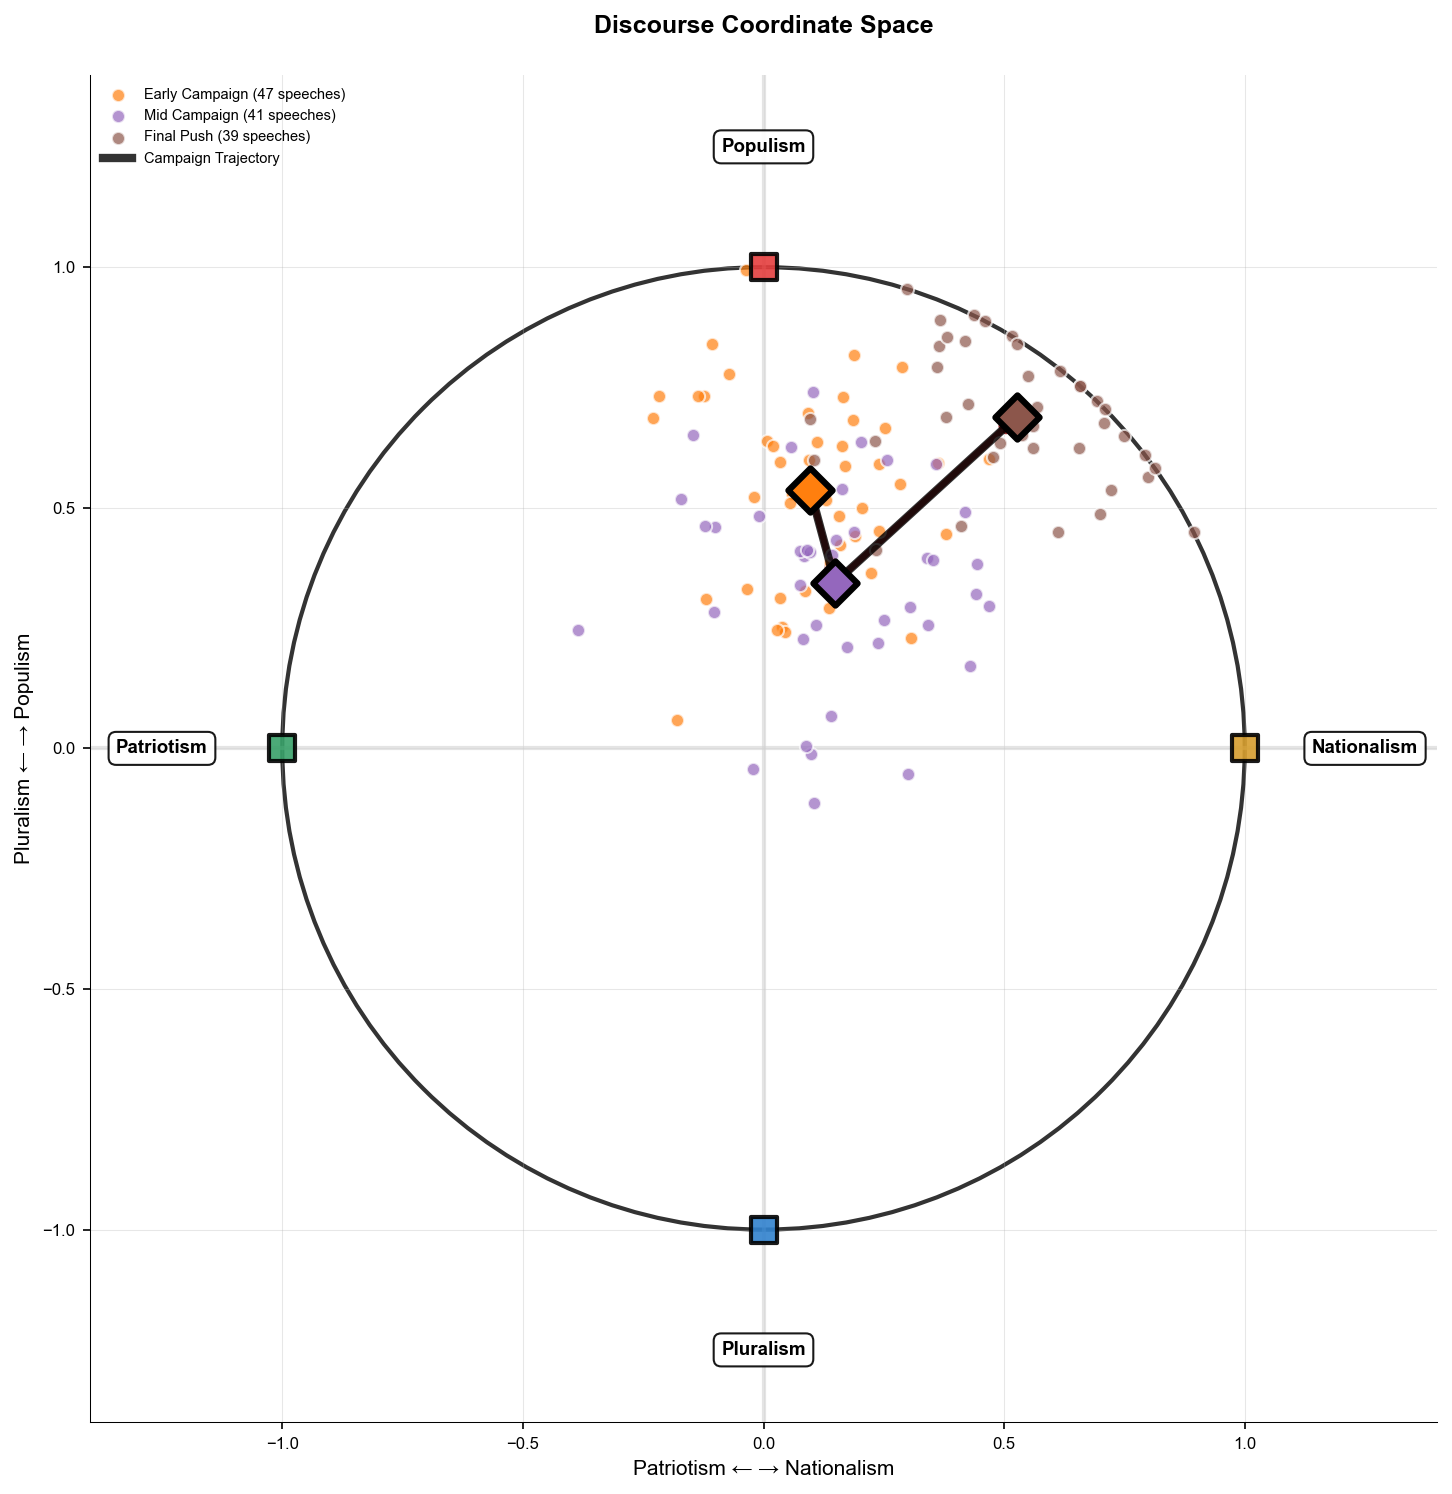

In [7]:
# Chart 1: Main Discourse Coordinate Space
print("🎯 Chart 1: Main Discourse Coordinate Space with Trajectory")
print("   ▸ Shows: Framework anchors, speech positions, phase centroids, trajectory")
print("   ▸ Focus: Core spatial analysis and temporal evolution")
print()

fig1, ax1 = plot_discourse_coordinate_space(framework, signatures, phase_data)
plt.show()


📐 Chart 2: Axis Independence Validation
   ▸ Shows: Correlation between horizontal and vertical axes
   ▸ Focus: Validates orthogonal framework design assumption



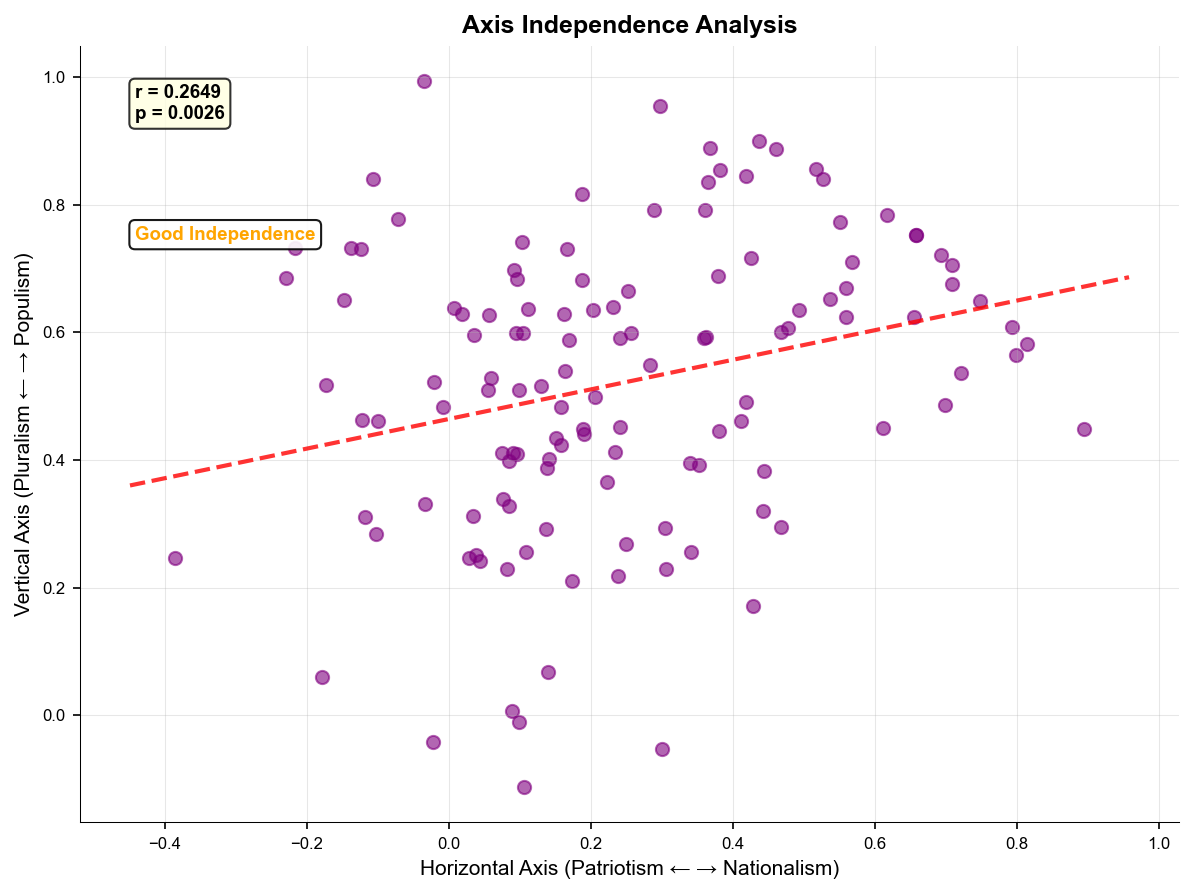

In [8]:
# Chart 2: Axis Independence Analysis
print("📐 Chart 2: Axis Independence Validation")
print("   ▸ Shows: Correlation between horizontal and vertical axes")
print("   ▸ Focus: Validates orthogonal framework design assumption")
print()

fig2, ax2 = plot_axis_independence(signatures)
plt.show()


📈 Chart 3: Ideological Score Evolution Across Campaign Phases
   ▸ Shows: Average scores for each ideology by campaign phase
   ▸ Focus: Tracks strategic messaging changes over time



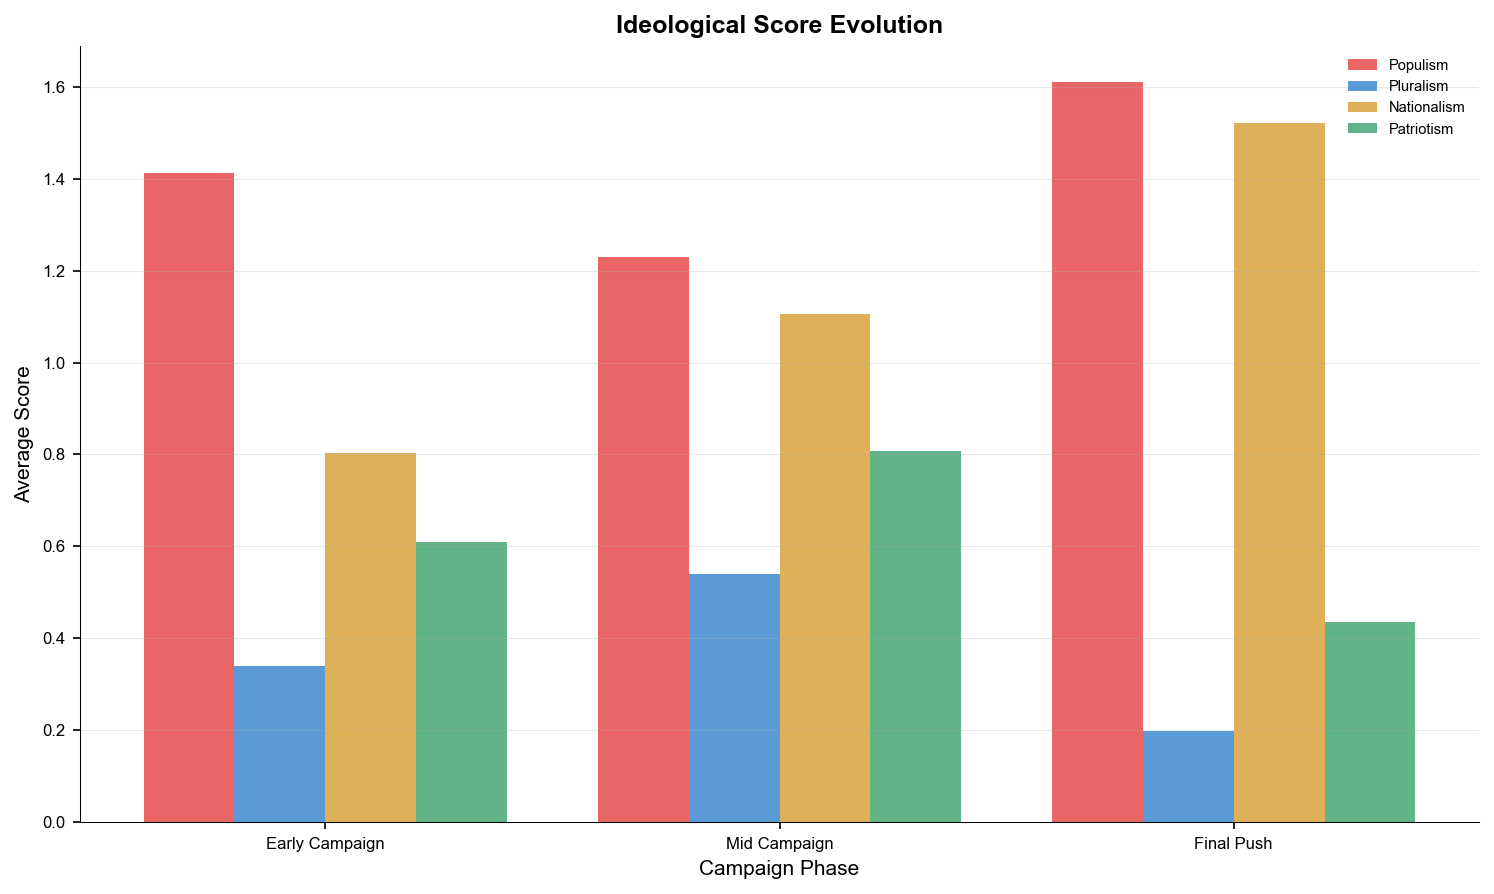

In [9]:
# Chart 3: Ideological Score Evolution
print("📈 Chart 3: Ideological Score Evolution Across Campaign Phases")
print("   ▸ Shows: Average scores for each ideology by campaign phase")
print("   ▸ Focus: Tracks strategic messaging changes over time")
print()

fig3, ax3 = plot_score_evolution(phase_data)
plt.show()


📊 Chart 4: Campaign Message Consistency (Discourse Dispersion)
   ▸ Shows: How spread out speeches are within each phase
   ▸ Focus: Measures messaging discipline and strategic focus



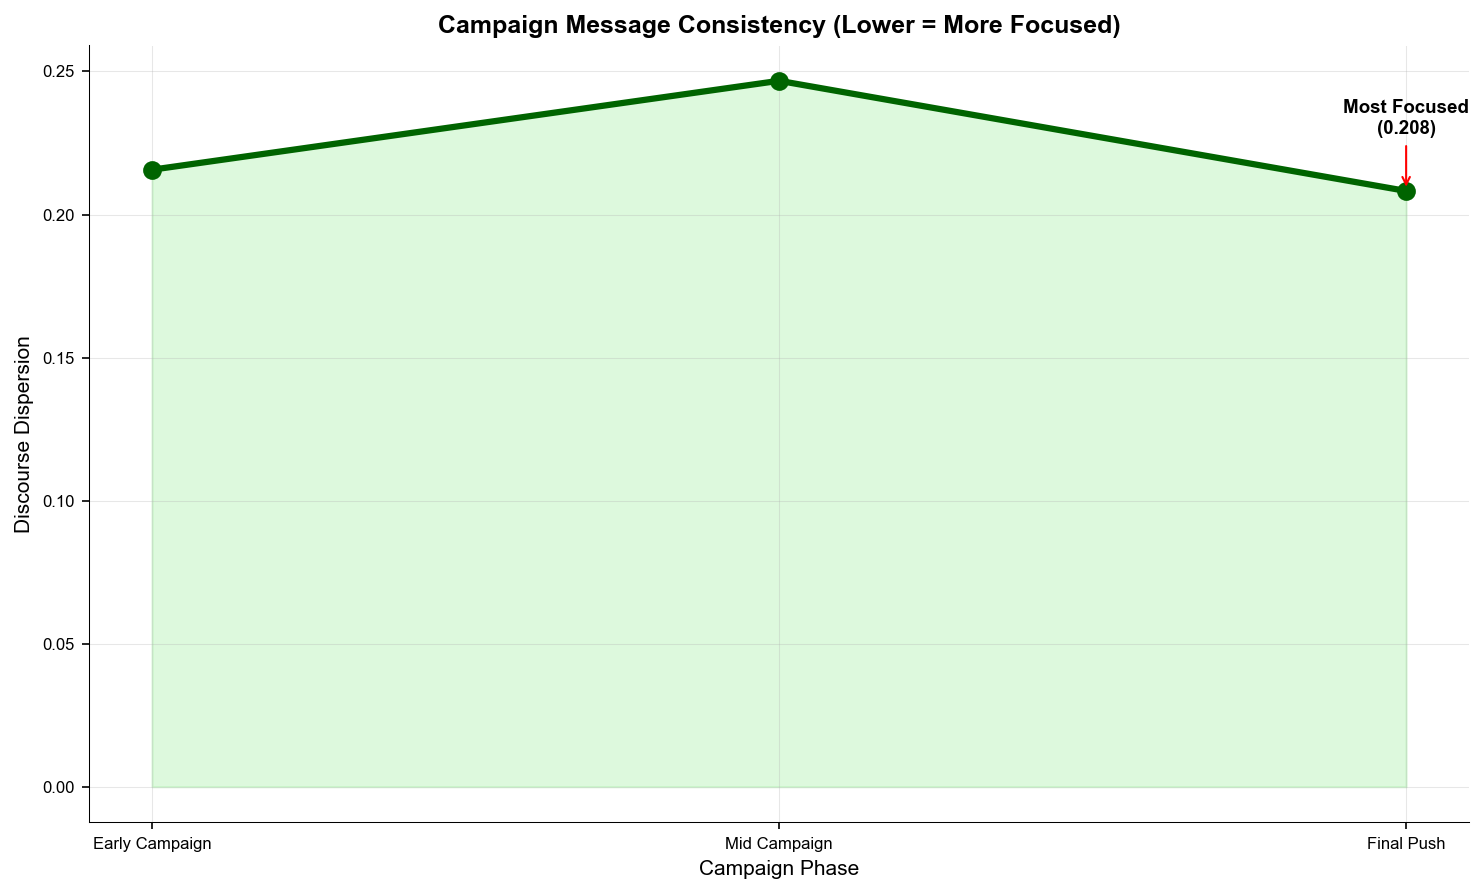

In [10]:
# Chart 4: Campaign Message Consistency
print("📊 Chart 4: Campaign Message Consistency (Discourse Dispersion)")
print("   ▸ Shows: How spread out speeches are within each phase")
print("   ▸ Focus: Measures messaging discipline and strategic focus")
print()

fig4, ax4 = plot_discourse_consistency(phase_data)
plt.show()


In [11]:
# 🎉 SUCCESS: Individual Charts Created for Iterative Development!

print("✅ ENHANCED TEMPLATE COMPLETE!")
print("=" * 60)
print("🎯 You now have 4 individual chart functions:")
print("   1. plot_discourse_coordinate_space() - Main spatial analysis")
print("   2. plot_axis_independence() - Orthogonal validation") 
print("   3. plot_score_evolution() - Temporal ideology tracking")
print("   4. plot_discourse_consistency() - Message focus analysis")
print()
print("🔧 ITERATION WORKFLOW:")
print("   • Pick a chart function to improve")
print("   • Edit colors, sizes, fonts in shared parameters")
print("   • Re-run just that chart cell to see changes")
print("   • Iterate quickly without regenerating everything")
print()
print("🎨 SHARED PARAMETER SYSTEM:")
print("   • ANCHOR_COLORS, PHASE_COLORS, ACCENT_COLORS")
print("   • MARKER_CONFIG, FONT_CONFIG, LAYOUT_CONFIG")
print("   • Changes propagate consistently across all charts")
print()
print("🚀 READY FOR GENERATOR INTEGRATION!")
print("   This modular design is perfect for dynamic notebook generation.")


✅ ENHANCED TEMPLATE COMPLETE!
🎯 You now have 4 individual chart functions:
   1. plot_discourse_coordinate_space() - Main spatial analysis
   2. plot_axis_independence() - Orthogonal validation
   3. plot_score_evolution() - Temporal ideology tracking
   4. plot_discourse_consistency() - Message focus analysis

🔧 ITERATION WORKFLOW:
   • Pick a chart function to improve
   • Edit colors, sizes, fonts in shared parameters
   • Re-run just that chart cell to see changes
   • Iterate quickly without regenerating everything

🎨 SHARED PARAMETER SYSTEM:
   • ANCHOR_COLORS, PHASE_COLORS, ACCENT_COLORS
   • MARKER_CONFIG, FONT_CONFIG, LAYOUT_CONFIG
   • Changes propagate consistently across all charts

🚀 READY FOR GENERATOR INTEGRATION!
   This modular design is perfect for dynamic notebook generation.
